The Notebook consists of inspection of California Landslide Shape file that is publically available as well as the inspection of Detailed California Landslides deposits polygon that is not publically available. 

# Initial Inspection

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdf = gpd.read_file("./Data/California/CGS_Information_Warehouse%3A_Landslide_Maps_and_Reports/CGS_Information_Warehouse%3A_Landslide_Maps_and_Reports.shp")

In [3]:
print(f"Number of landslides: {len(gdf)}")

Number of landslides: 355


In [4]:
print(f"Number of fields (columns): {len(gdf.columns)}\n")
print("Field names and dtypes:")
print(gdf.dtypes)

Number of fields (columns): 8

Field names and dtypes:
OBJECTID         int32
CELL_NAME       object
USGSCode        object
SymbolID         int32
PopupInfo       object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object


In [5]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    355 non-null    int32   
 1   CELL_NAME   355 non-null    object  
 2   USGSCode    355 non-null    object  
 3   SymbolID    355 non-null    int32   
 4   PopupInfo   355 non-null    object  
 5   Shape__Are  355 non-null    float64 
 6   Shape__Len  355 non-null    float64 
 7   geometry    355 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(3)
memory usage: 19.5+ KB


In [6]:
null_counts = gdf.isnull().sum()
pct_filled = (1 - null_counts / len(gdf)) * 100
df_null = pd.DataFrame({
    "null_count": null_counts,
    "% filled": pct_filled.round(1)
}).sort_values("null_count")
print("\nNull counts and % filled per field:")
print(df_null)


Null counts and % filled per field:
            null_count  % filled
OBJECTID             0     100.0
CELL_NAME            0     100.0
USGSCode             0     100.0
SymbolID             0     100.0
PopupInfo            0     100.0
Shape__Are           0     100.0
Shape__Len           0     100.0
geometry             0     100.0


In [7]:
gdf.head(10)

,OBJECTID,CELL_NAME,USGSCode,SymbolID,PopupInfo,Shape__Are,Shape__Len,geometry
0,1,Orick,41124C1,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-124 41.25, -124.125 41.25, -124.125..."
1,2,Point Reyes NE,38122B7,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-122.75 38.125, -122.875 38.125, -12..."
2,3,Petaluma,38122B6,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-122.625 38.125, -122.75 38.125, -12..."
3,4,Petaluma River,38122B5,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-122.5 38.125, -122.625 38.125, -122..."
4,5,National City,32117F1,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-117 32.625, -117.125 32.625, -117.1..."
5,6,Oxnard,34119B2,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-119.125 34.125, -119.25 34.125, -11..."
6,7,Pacifico Mountain,34118D1,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-118 34.375, -118.125 34.375, -118.1..."
7,8,Malibu Beach,34118A6,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-118.625 34, -118.75 34, -118.75 34...."
8,9,Two Rock,38122C7,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-122.75 38.25, -122.875 38.25, -122...."
9,10,Lower Lake,38122H5,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-122.5 38.875, -122.625 38.875, -122..."


In [8]:
gdf.tail(10)

,OBJECTID,CELL_NAME,USGSCode,SymbolID,PopupInfo,Shape__Are,Shape__Len,geometry
345,346,Topanga,34118A5,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-118.5 34, -118.625 34, -118.625 34...."
346,347,Fields Landing,40124F2,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-124.125 40.625, -124.25 40.625, -12..."
347,348,Hydesville,40124E1,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-124 40.5, -124.125 40.5, -124.125 4..."
348,349,Lord-Ellis Summit,40123H7,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-123.75 40.875, -123.875 40.875, -12..."
349,350,Comptche,39123C5,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-123.5 39.25, -123.625 39.25, -123.6..."
350,351,Azusa,34117B8,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-117.875 34.125, -118 34.125, -118 3..."
351,352,Canada Gobernadora,33117E5,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-117.5 33.5, -117.625 33.5, -117.625..."
352,353,Tomales,38122B8,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-122.875 38.125, -123 38.125, -123 3..."
353,354,Riverton,38120G4,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-120.375 38.75, -120.5 38.75, -120.5..."
354,355,Walnut Creek,37122H1,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",0.015625,0.5,"POLYGON ((-122 37.875, -122.125 37.875, -122.1..."


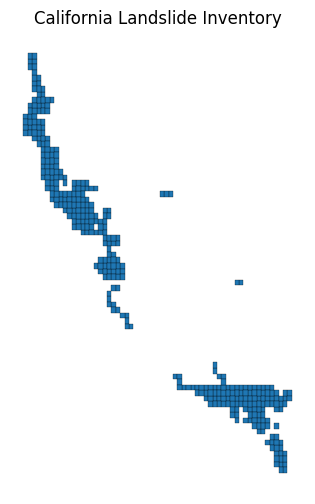

In [10]:
gdf.plot(figsize=(8, 6), edgecolor="k", linewidth=0.2)
plt.title("California Landslide Inventory")
plt.axis("off")
plt.show()

In [16]:
# Spatial extent
minx, miny, maxx, maxy = gdf.total_bounds
print(f"\nSpatial bounds:\n  minx: {minx}, miny: {miny}\n  maxx: {maxx}, maxy: {maxy}")



Spatial bounds:
  minx: -124.37499999988, miny: 32.4999999990269
  maxx: -116.749999999868, maxy: 41.9999999990001


# Numerical Analysis

In [11]:
# Seperating deposits by column types
numerical_cols = gdf.select_dtypes(include=['number']).columns.tolist()

non_numerical_cols = gdf.select_dtypes(exclude=['number']).columns.tolist()

In [12]:
print("Numerical Columns:")
for col in numerical_cols:
    print(f"  - {col}")

print("\nNon-Numerical Columns:")
for col in non_numerical_cols:
    print(f"  - {col}")

Numerical Columns:
  - OBJECTID
  - SymbolID
  - Shape__Are
  - Shape__Len

Non-Numerical Columns:
  - CELL_NAME
  - USGSCode
  - PopupInfo
  - geometry


In [13]:
print("\nStatistical summary for Numerical data:")
numerical_stats = gdf[numerical_cols].describe().T
print(numerical_stats[["min", "max", "mean", "std"]])


Statistical summary for Numerical data:
                 min         max        mean           std
OBJECTID    1.000000  355.000000  178.000000  1.026239e+02
SymbolID    2.000000    2.000000    2.000000  0.000000e+00
Shape__Are  0.015625    0.015625    0.015625  6.552385e-11
Shape__Len  0.500000    0.500000    0.500000  1.048582e-09


In [15]:
print("\nStatistical summary for Numerical data:")
numerical_stats = gdf[["Shape__Are", "Shape__Len"]].describe().T
print(numerical_stats[["min", "max", "mean", "std"]])


Statistical summary for Numerical data:
                 min       max      mean           std
Shape__Are  0.015625  0.015625  0.015625  6.552385e-11
Shape__Len  0.500000  0.500000  0.500000  1.048582e-09


# Non Numerical Analysis

In [17]:
for col in non_numerical_cols:
    if col in gdf.columns:
        print(f"\nValue counts for {col}:")
        print(gdf[col].value_counts(dropna=False))


Value counts for CELL_NAME:
CELL_NAME
Orick            1
Laytonville      1
Burbeck          1
Bailey Ridge     1
Guerneville      1
                ..
Mathison Peak    1
Independence     1
Dublin           1
Myers Flat       1
Walnut Creek     1
Name: count, Length: 355, dtype: int64

Value counts for USGSCode:
USGSCode
41124C1    1
39123F4    1
39123D4    1
39123B4    1
38122E8    1
          ..
39123C6    1
36118G2    1
37121F8    1
40123C7    1
37122H1    1
Name: count, Length: 355, dtype: int64

Value counts for PopupInfo:
PopupInfo
<html xmlns:fo="http://www.w3.org/1999/XSL/Format">\n<style>\ntable {width:250px;}\ntable, td {\n  font-family:Arial;\n  font-size:8pt;\n  }\n\ntd#col1 td {\n  width=5px;\n  }\n  </style>\n  \n<body>\n<table>\n<tr><td colspan=3><b>Orick Quadrangle:</b></td></tr>\n<tr><t    1
<html xmlns:fo="http://www.w3.org/1999/XSL/Format">\n<style>\ntable {width:250px;}\ntable, td {\n  font-family:Arial;\n  font-size:8pt;\n  }\n\ntd#col1 td {\n  width=5px;\n  }\n  

In [18]:
print("\nNon-Numerical Columns:")
for col in non_numerical_cols:
    print(f"  - {col}")


Non-Numerical Columns:
  - CELL_NAME
  - USGSCode
  - PopupInfo
  - geometry


### USGS Code

In [23]:
print("\nValue counts for 'USGSCode':")
print(gdf['USGSCode'].value_counts())


Value counts for 'USGSCode':
USGSCode
41124C1    1
39123F4    1
39123D4    1
39123B4    1
38122E8    1
          ..
39123C6    1
36118G2    1
37121F8    1
40123C7    1
37122H1    1
Name: count, Length: 355, dtype: int64


In [24]:
sorted_counts = gdf['USGSCode'].value_counts().sort_values(ascending=False)
print(sorted_counts)

USGSCode
41124C1    1
39123C4    1
38122B6    1
38122B5    1
32117F1    1
          ..
33117E5    1
38122B8    1
38120G4    1
34118A5    1
37122H1    1
Name: count, Length: 355, dtype: int64


### Geometry

In [19]:
print("\nValue counts for 'geometry':")
print(gdf['geometry'].value_counts())


Value counts for 'geometry':
geometry
POLYGON ((-124 41.25, -124.125 41.25, -124.125...    1
POLYGON ((-123.375 39.25, -123.5 39.25, -123.5...    1
POLYGON ((-122.625 38.125, -122.75 38.125, -12...    1
POLYGON ((-122.5 38.125, -122.625 38.125, -122...    1
POLYGON ((-117 32.625, -117.125 32.625, -117.1...    1
                                                    ..
POLYGON ((-117.5 33.5, -117.625 33.5, -117.625...    1
POLYGON ((-122.875 38.125, -123 38.125, -123 3...    1
POLYGON ((-120.375 38.75, -120.5 38.75, -120.5...    1
POLYGON ((-118.5 34, -118.625 34, -118.625 34....    1
POLYGON ((-122 37.875, -122.125 37.875, -122.1...    1
Name: count, Length: 355, dtype: int64


In [20]:
gdf['geometry_type'] = gdf['geometry'].geom_type
print("\nValue counts for 'Geometry':")
print(gdf['geometry_type'].value_counts())


Value counts for 'Geometry':
geometry_type
Polygon    355
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_83359/2679377302.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geometry_counts.index, y=geometry_counts.values, palette='plasma')


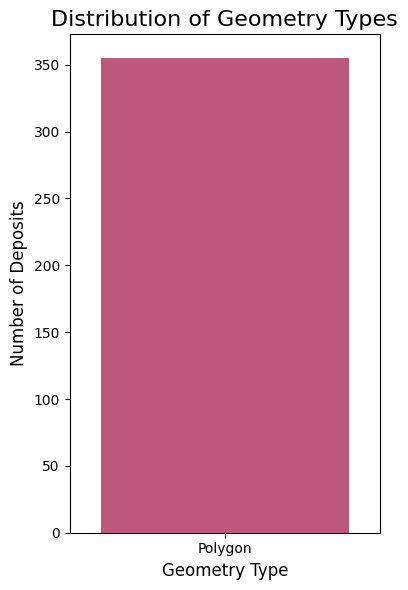

In [21]:
plt.figure(figsize=(4, 6))

geometry_counts = gdf['geometry_type'].value_counts()

# Create the bar plot
sns.barplot(x=geometry_counts.index, y=geometry_counts.values, palette='plasma')

# Add titles and labels for clarity
plt.title('Distribution of Geometry Types', fontsize=16)
plt.xlabel('Geometry Type', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

plt.tight_layout()
plt.show()

# New GDB Dataset

In [17]:
import fiona
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
gdb_dir = "../data/California/CGS_lsi_FullState_20201120_withDataDictionary/CGS_lsi_FullState_20201120.gdb"

In [5]:
layers = fiona.listlayers(gdb_dir)
print("Layers in SLIDO-4.5 geodatabase:")
for lyr in layers:
    print("  -", lyr)


Layers in SLIDO-4.5 geodatabase:
  - ls_ssf_poly
  - ls_source_line
  - ls_source_point
  - ls_source_poly
  - ls_ssf_line
  - ls_ssf_point
  - ls_deposit_line
  - ls_deposit_point
  - ls_deposit_poly


In [6]:
deposits = gpd.read_file(gdb_dir, layer="ls_deposit_poly")

In [7]:
deposits.head(10)

,ls_id,ls_master,activity,init_type,subs_type,mvmt_mode,confidence,thickness,dir_mvmt,base_map,...,mvmt_date_yr,mvmt_date_mon,mvmt_date_day,triggering_event,superseded,citable_product_url,gis_source,SHAPE_Length,SHAPE_Area,geometry
0,garbv3000,None,dy,ef,None,cx,d,d,NaN,None,...,NaN,NaN,NaN,None,None,,G:\CGS\GM_Work\Landslide Inventories\StateLand...,4514.907479,537242.502802,"MULTIPOLYGON (((-321910.532 230390.845, -32177..."
1,garbv3001,None,dm,rs,None,st,p,d,NaN,None,...,NaN,NaN,NaN,None,None,,G:\CGS\GM_Work\Landslide Inventories\StateLand...,2055.370500,301966.202171,"MULTIPOLYGON (((-322495.014 229727.948, -32257..."
2,garbv3002,None,dm,rs,None,st,d,d,NaN,None,...,NaN,NaN,NaN,None,None,,G:\CGS\GM_Work\Landslide Inventories\StateLand...,1897.501943,231354.613491,"MULTIPOLYGON (((-322143.399 232134.846, -32217..."
3,garbv3003,None,dy,ef,None,cp,d,m,NaN,None,...,NaN,NaN,NaN,None,None,,G:\CGS\GM_Work\Landslide Inventories\StateLand...,1782.035785,96368.797755,"MULTIPOLYGON (((-321839.132 231769.128, -32188..."
4,garbv3004,None,dy,ef,None,cx,d,m,NaN,None,...,NaN,NaN,NaN,None,None,,G:\CGS\GM_Work\Landslide Inventories\StateLand...,2282.248739,202451.153151,"MULTIPOLYGON (((-319923.317 229985.91, -319895..."
5,garbv3006,None,dy,rs,ef,cx,d,m,NaN,None,...,NaN,NaN,NaN,None,None,,G:\CGS\GM_Work\Landslide Inventories\StateLand...,684.350319,31015.654132,"MULTIPOLYGON (((-321819.359 233089.061, -32186..."
6,garbv3005,None,dy,ef,rs,cx,d,d,NaN,None,...,NaN,NaN,NaN,None,None,,G:\CGS\GM_Work\Landslide Inventories\StateLand...,3005.290278,473392.358668,"MULTIPOLYGON (((-321004.644 232636.966, -32084..."
7,garbv3008,None,dm,ef,None,cx,d,m,NaN,None,...,NaN,NaN,NaN,None,None,,G:\CGS\GM_Work\Landslide Inventories\StateLand...,2007.565039,176059.862121,"MULTIPOLYGON (((-320024.66 231657.092, -319998..."
8,garbv3009,None,h,ef,None,cx,d,m,NaN,None,...,NaN,NaN,NaN,None,None,,G:\CGS\GM_Work\Landslide Inventories\StateLand...,1989.959154,147206.160167,"MULTIPOLYGON (((-322882.657 236435.674, -32289..."
9,leg3000,None,h,rs,None,st,d,d,NaN,None,...,NaN,NaN,NaN,None,None,,G:\CGS\GM_Work\Landslide Inventories\StateLand...,8035.257698,655786.669150,"MULTIPOLYGON (((-313580.075 207013.059, -31356..."


In [8]:
deposits.dtypes

ls_id                        object
ls_master                    object
activity                     object
init_type                    object
subs_type                    object
mvmt_mode                    object
confidence                   object
thickness                    object
dir_mvmt                    float64
base_map                     object
map_year                    float64
ls_data_source_type          object
ls_data_source_desc          object
prim_geol_unit_map_symb      object
prim_geol_unit_name          object
sec_geol_unit_map_symb       object
sec_geol_unit_name           object
geol_data_source             object
strike_az                   float64
dip                         float64
attitude_type                object
att_data_source              object
remarks                      object
data_class                   object
citable_product              object
mvmt_date_yr                float64
mvmt_date_mon               float64
mvmt_date_day               

In [22]:
data_class_counts = deposits['data_class'].value_counts()
print("\nValue counts for 'Data Class':")
print(data_class_counts)


Value counts for 'Data Class':
data_class
C    14581
D     4156
A     2092
Name: count, dtype: int64


## Confidence

Confidence of interpretation; definite (d), probable (p), questionable (q).

In [10]:
confidence_counts = deposits['confidence'].value_counts()
print("\nValue counts for 'Confidence':")
print(confidence_counts)


Value counts for 'Confidence':
confidence
d    6805
p    5149
q    3497
c       3
h       2
r       1
o       1
Name: count, dtype: int64


## Movement Mode

Official Documentation - Landslide Movement Mode 

In [12]:
movement_mode_counts = deposits['mvmt_mode'].value_counts()
print("\nValue counts for 'Movement Mode':")
print(movement_mode_counts)


Value counts for 'Movement Mode':
mvmt_mode
sc    931
st    368
sr    309
cx    257
cp    254
fa     57
ff     28
sw     14
d       4
lf      3
lb      2
p       2
q       1
cl      1
pl      1
tc      1
lr      1
c       1
Name: count, dtype: int64


## Initial Movement Type

In [ ]:
# Seperate this out into material and movement type

Initial movement type.  Combine material type (r-rock, s-soil, e-earth, d-debris) with movement type (s-slide, f-flow, t-topple, p-spread, l-fall) or multiple movement types (composite-cl). 

In [13]:
init_movement_counts = deposits['init_type'].value_counts()
print("\nValue counts for 'Initial Movement Type':")
print(init_movement_counts)


Value counts for 'Initial Movement Type':
init_type
rs     7046
df     2878
ef     2406
ds     1042
cl      535
ss      135
dn       79
rl       11
rsc       7
q         7
d         6
st        4
p         4
          3
rp        1
Name: count, dtype: int64


In [19]:
material_mapping = {
    'r': 'Rock',
    's': 'Soil',
    'e': 'Earth',
    'd': 'Debris',
}

movement_mapping = {
    's': 'Slide',
    'f': 'Flow',
    't': 'Topple',
    'p': 'Spread',
    'l': 'Fall',
    'n': 'Not Classified',
    'c': 'Composite'
}

deposits['material_type'] = 'Other'
deposits['movement_type'] = 'Other'

def extract_material_movement(init_type):
    if not isinstance(init_type, str) or len(init_type) < 2:
        return ('Other', 'Other')
    
    material_code = init_type[0]
    movement_code = init_type[1]
    
    material = material_mapping.get(material_code, 'Other')
    movement = movement_mapping.get(movement_code, 'Other')
    
    return (material, movement)

material_movement = deposits['init_type'].apply(extract_material_movement)
deposits['material_type'] = material_movement.apply(lambda x: x[0])
deposits['movement_type'] = material_movement.apply(lambda x: x[1])

# Display value counts for the new columns
print("\nMaterial Type Distribution:")
print(deposits['material_type'].value_counts())

print("\nMovement Type Distribution:")
print(deposits['movement_type'].value_counts())



Material Type Distribution:
material_type
Other     11268
Rock       7065
Debris     3999
Earth      2406
Soil        139
Name: count, dtype: int64

Movement Type Distribution:
movement_type
Other             10733
Slide              8230
Flow               5284
Fall                546
Not Classified       79
Topple                4
Spread                1
Name: count, dtype: int64


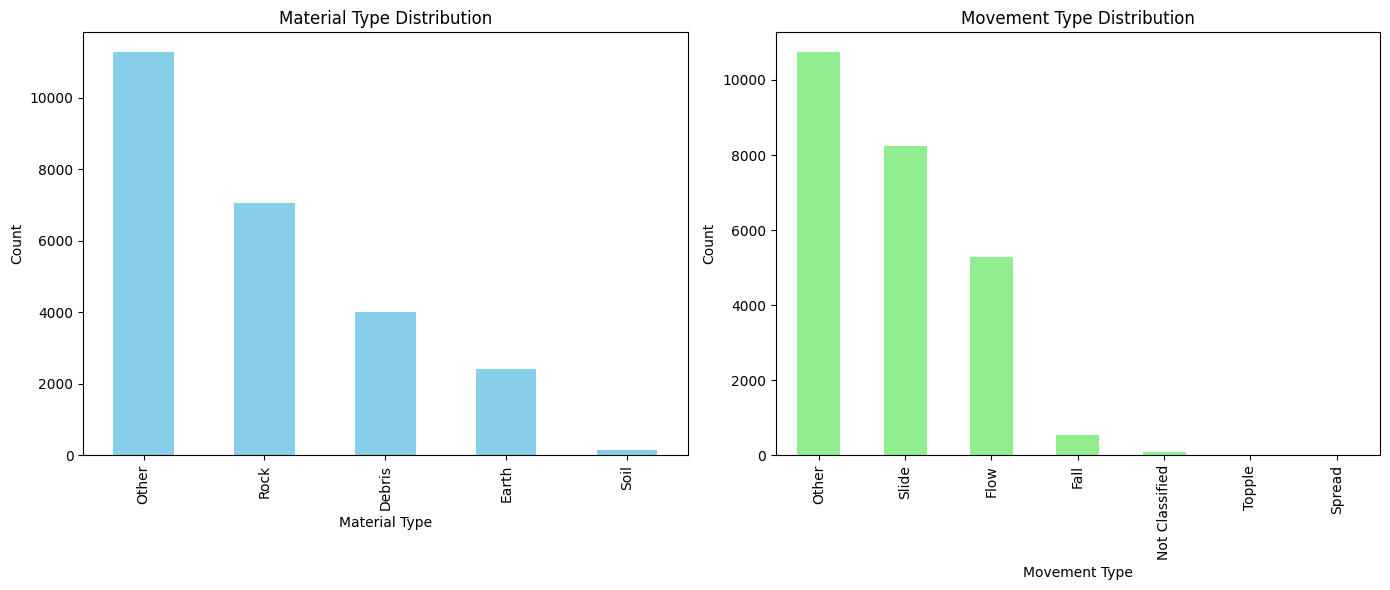

In [21]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


deposits['material_type'].value_counts().plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Material Type Distribution')
ax1.set_xlabel('Material Type')
ax1.set_ylabel('Count')

deposits['movement_type'].value_counts().plot(kind='bar', ax=ax2, color='lightgreen')
ax2.set_title('Movement Type Distribution')
ax2.set_xlabel('Movement Type')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

## Subsequent Movement Type

In [15]:
subs_movement_counts = deposits['subs_type'].value_counts()
print("\nValue counts for 'Subsequent Movement Type':")
print(subs_movement_counts)


Value counts for 'Subsequent Movement Type':
subs_type
ds    232
df     79
ef     23
dn      9
rs      3
ss      3
Name: count, dtype: int64


## Activity 

Landslide activity.  Acceptable values are h (historically active, dormant historic), d (unspecified dormant), dy (dormant young), dm (dormant mature), do (dormant old/relict)

In [14]:
activity_counts = deposits['activity'].value_counts()
print("\nValue counts for 'Activity':")
print(activity_counts)


Value counts for 'Activity':
activity
dy    4107
dm    1887
h     1663
do     421
d        1
df       1
Name: count, dtype: int64
